## Loading Imp Libraries & Transformed Dataset:

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score

import pickle

In [45]:
df = pd.read_csv("final_df.csv")
df.head()

,Brand,Model,Body Type,Drivetrain,Interior Colour,Exterior Colour,Fuel Type,Transmission Type,Doors,Cylinder Count,Distance (km),Mileage (kms/Lt),Years Used,Price
0,0.0,10.0,8.0,3.0,7.0,0.0,2.0,0.0,4.0,6.0,53052.0,9.2,5.0,43880.0
1,0.0,10.0,8.0,3.0,1.0,3.0,2.0,0.0,3.0,6.0,77127.0,9.1,6.0,36486.0
2,0.0,10.0,8.0,3.0,1.0,5.0,8.0,0.0,4.0,4.0,33032.0,10.1,5.0,40888.0
3,0.0,10.0,8.0,3.0,1.0,5.0,2.0,2.0,4.0,4.0,50702.0,10.1,4.0,44599.0
4,0.0,10.0,8.0,3.0,7.0,1.0,2.0,2.0,4.0,4.0,67950.0,9.7,3.0,46989.0


## Dataset Train-Test Split:

In [46]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
# (x,y)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

## Dataset Transformation using StandardScalar:

In [47]:
scaler = StandardScaler()
scaler.fit(X_train) 

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


with open(r'P:\Personal Projects\Vehicle Price Prediction\Vehicle Price Prediction\Models\scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Model Training, Fitting & Output Prediction:

In [37]:
rf = RandomForestRegressor(max_depth=9, min_samples_split=2, min_samples_leaf=1, max_features='sqrt')
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

## Model Performance Visualization:

C:\Users\HP\AppData\Local\Temp\ipykernel_25808\951634181.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: xlabel='Price', ylabel='Density'>

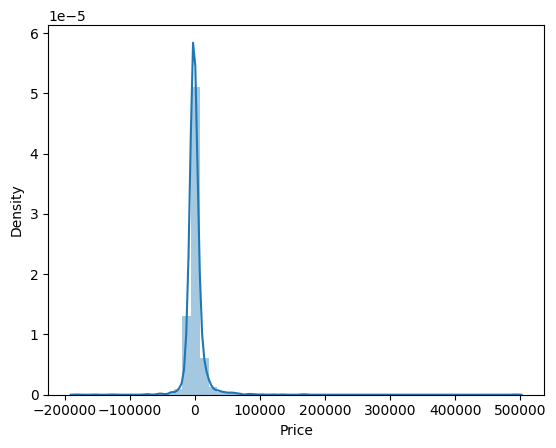

In [38]:
# A close gaussian distribution graph indicates that the difference between actual & predicted values is very minimal

sns.distplot(y_test-y_pred)

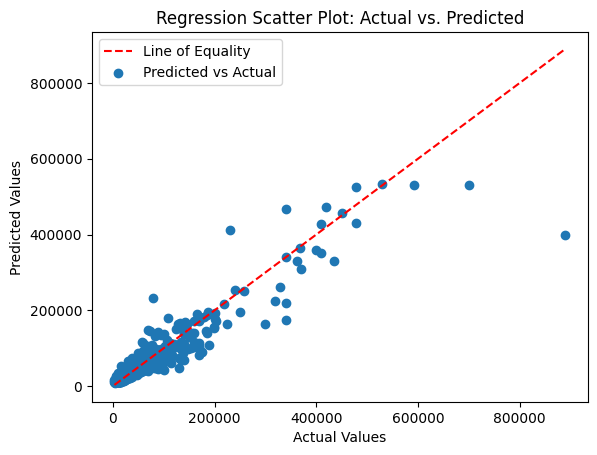

In [40]:
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color='red', linestyle='--', label='Line of Equality')
plt.scatter(y_test,y_pred, label='Predicted vs Actual')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Scatter Plot: Actual vs. Predicted')
plt.legend()

plt.show()

## Model Performance Evaluation:

In [41]:
# R-squared
r_squared = r2_score(y_test, y_pred)

# Manual calculation of Adjusted R-squared
n = x.shape[0]  # number of observations
p = x.shape[1]  # number of predictors (features)

adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f"R-squared: {round((r_squared),2)}")
print(f"Adjusted R-squared: {round((adjusted_r_squared),2)}")

R-squared: 0.87
Adjusted R-squared: 0.87


## Save the final Model:

In [49]:
with open(r'P:\Personal Projects\Vehicle Price Prediction\Vehicle Price Prediction\Models\random_forest_regressor_model.pkl', 'wb') as f:
    pickle.dump(rf, f)